### Detecting Outliers via Statistics

##### Statistical Checks

In [1]:
import numpy as np

# Example data
data = np.array([-1, 12, 14, 15, 16, 18, 19, 100, 20, 22])

# Compute basic stats
mean = np.mean(data)
std_dev = np.std(data)
median = np.median(data)
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1

print(f"Mean = {mean}")
print(f"Standard Deviation = {std_dev}")
print(f"Median = {median}")
print(f"Q1 (25th percentile) = {q1}")
print(f"Q3 (75th percentile) = {q3}")
print(f"IQR = {iqr}")

# Define outlier bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(f"Lower bound = {lower_bound}")
print(f"Upper bound = {upper_bound}")

# Identify outliers
outliers = data[(data < lower_bound) | (data > upper_bound)]
print(f"Outliers = {outliers}")


Mean = 23.5
Standard Deviation = 26.207823259477312
Median = 17.0
Q1 (25th percentile) = 14.25
Q3 (75th percentile) = 19.75
IQR = 5.5
Lower bound = 6.0
Upper bound = 28.0
Outliers = [ -1 100]


##### Visualization

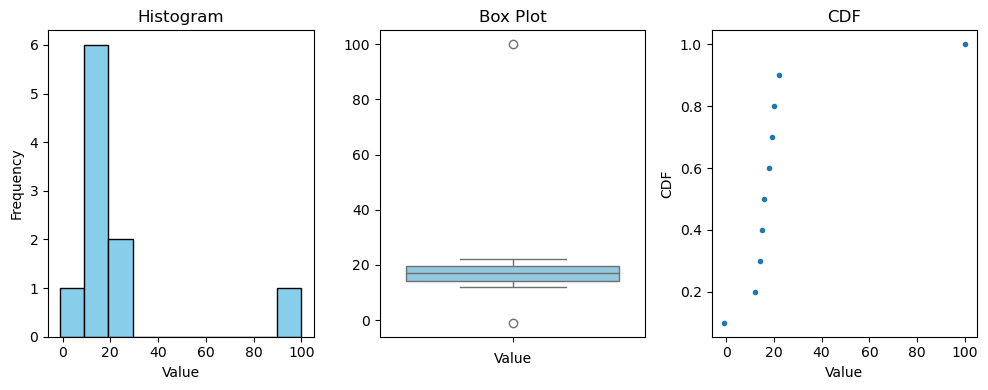

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data array
data = np.array([-1, 12, 14, 15, 16, 18, 19, 100, 20, 22])

plt.figure(figsize=(10, 4))

# Histogram
plt.subplot(1, 3, 1)
plt.hist(data, bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Box Plot
plt.subplot(1, 3, 2)
sns.boxplot(data, color='skyblue')
plt.title('Box Plot')
plt.xlabel('Value')

# CDF
plt.subplot(1, 3, 3)
sorted_data = np.sort(data)
cdf = np.arange(1, len(data)+1) / len(data)
plt.plot(sorted_data, cdf, marker='.', linestyle='none')
plt.title('CDF')
plt.xlabel('Value')
plt.ylabel('CDF')

plt.tight_layout()
plt.show()


### Handling Outliers

##### Median Imputation
> Use the **median** of the variable to replace any outliers. This is robust because the median itself isn't skewed by extremes.

In [ ]:
import numpy as np
import pandas as pd

# Sample data
data = np.array([-1, 12, 14, 15, 16, 15, 19, 100, 20, 22])
df = pd.DataFrame(data, columns=['Value'])

# Compute Q1, Q3, IQR
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (df['Value'] < lower_bound) | (df['Value'] > upper_bound)

# Replace them with the median
median = df['Value'].median()
df.loc[outliers, 'Value'] = median

print(df)


   Value
0     17
1     12
2     14
3     15
4     16
5     18
6     19
7     17
8     20
9     22


##### Mean Imputation
> Replace outliers with the **mean**. Suitable when data are symmetrically distributed---but beware that the mean itself is influenced by extremes.

In [ ]:
import numpy as np
import pandas as pd

# Sample data
data = np.array([-1, 12, 14, 15, 16, 15, 19, 100, 20, 22])
df = pd.DataFrame(data, columns=['Value'])

# Compute Q1, Q3, IQR
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (df['Value'] < lower_bound) | (df['Value'] > upper_bound)

# Replace them with the mean
mean = df['Value'].mean()
df.loc[outliers, 'Value'] = mean

print(df)


   Value
0   23.5
1   12.0
2   14.0
3   15.0
4   16.0
5   18.0
6   19.0
7   23.5
8   20.0
9   22.0


/tmp/ipykernel_13182/3558881393.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '23.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outliers, 'Value'] = mean


##### Mode Imputation
> Use the `mode` (most frequent value) to replace outliers. Works well for categorical data or numeric data with a clear peak.

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

# Sample data
data = np.array([-1, 12, 14, 15, 16, 15, 19, 100, 20, 22])
df = pd.DataFrame(data, columns=['Value'])

# Compute Q1, Q3, IQR
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (df['Value'] < lower_bound) | (df['Value'] > upper_bound)

# Replace them with the mode
mode = stats.mode(df['Value'])[0]
df.loc[outliers, 'Value'] = mode

print(df)


   Value
0     15
1     12
2     14
3     15
4     16
5     15
6     19
7     15
8     20
9     22


##### Row Removal
> If outliers are numerous or widely scattered, you may choose to remove those entire records at once. This avoids imputation bias but discards potentially useful data.

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

# Sample data
data = np.array([-1, 12, 14, 15, 16, 15, 19, 100, 20, 22])
df = pd.DataFrame(data, columns=['Value'])

# Compute Q1, Q3, IQR
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (df['Value'] < lower_bound) | (df['Value'] > upper_bound)

df_cleaned = df[~outliers].reset_index(drop=True)
print(df_cleaned)

   Value
0     12
1     14
2     15
3     16
4     18
5     19
6     20
7     22


### Data Cleaning and Preprocessing

##### Handling Missing Values

In [3]:
import pandas as pd
import numpy as np

# Build a simple height–weight dataset with two missing heights
data = {
    "Height": [145, 155, 165, 170, 175, np.nan, 180, 185, np.nan, 190],
    "Weight": [35, 45, 55, 60, 65, 70, 75, 80, 85, 90]
}

df = pd.DataFrame(data)
df

,Height,Weight
0,145.0,35
1,155.0,45
2,165.0,55
3,170.0,60
4,175.0,65
5,NaN,70
6,180.0,75
7,185.0,80
8,NaN,85
9,190.0,90


In [ ]:
# If the fraction of missing data is very small, you may simply remove those records
df = pd.DataFrame(data)
df.dropna(inplace=True)
print("After dropping missing rows:")
df

After dropping missing rows:


,Height,Weight
0,145.0,35
1,155.0,45
2,165.0,55
3,170.0,60
4,175.0,65
6,180.0,75
7,185.0,80
9,190.0,90


In [11]:
# Median Imputation
df = pd.DataFrame(data)

median_height = df['Height'].median()
df['Height'].fillna(median_height, inplace=True)

print("Median used for imputation:", median_height)
print("\nData after median imputation:")
df


Median used for imputation: 172.5

Data after median imputation:


/tmp/ipykernel_10000/538945578.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Height'].fillna(median_height, inplace=True)


,Height,Weight
0,145.0,35
1,155.0,45
2,165.0,55
3,170.0,60
4,175.0,65
5,172.5,70
6,180.0,75
7,185.0,80
8,172.5,85
9,190.0,90


In [13]:
# Mean Imputation
df = pd.DataFrame(data)

mean_height = df['Height'].mean()
df['Height'].fillna(mean_height, inplace=True)

print("Mean used for imputation:", mean_height)
print("\nData after mean imputation:")
df


Mean used for imputation: 170.625

Data after mean imputation:


/tmp/ipykernel_10000/3135116675.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Height'].fillna(mean_height, inplace=True)


,Height,Weight
0,145.000,35
1,155.000,45
2,165.000,55
3,170.000,60
4,175.000,65
5,170.625,70
6,180.000,75
7,185.000,80
8,170.625,85
9,190.000,90


##### Handling Categorical Data

Label Encoding

>Map each category to a unique integer (no ordinal meaning)

In [4]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the encoder
le = LabelEncoder()

# Sample gender labels
gender = ['male', 'female', 'female', 'male', 'male']

# Fit and transform to integer codes
encoded_gender = le.fit_transform(gender)

# Inverse-transform back to original labels
decoded_gender = le.inverse_transform(encoded_gender)

print(f"Original labels: {gender}")
print(f"Encoded labels:  {encoded_gender}")
print(f"Decoded labels:  {decoded_gender}")


Original labels: ['male', 'female', 'female', 'male', 'male']
Encoded labels:  [1 0 0 1 1]
Decoded labels:  ['male' 'female' 'female' 'male' 'male']


In [5]:
import numpy as np

# Retrieve the classes in the order they were encoded
encoded_classes = le.classes_
print(f"Encoded classes: {encoded_classes}")

# Count how many times each encoded value appears
unique, counts = np.unique(encoded_gender, return_counts=True)
gender_counts = dict(zip(
    le.inverse_transform(unique),  # map codes back to original labels
    counts                         # their counts
))
print(f"Gender counts: {gender_counts}")


Encoded classes: ['female' 'male']
Gender counts: {np.str_('female'): np.int64(2), np.str_('male'): np.int64(3)}


Ordinal Encoding

>When your categories have a natural order (e.g. “small” < “medium” < “large”), you can use ordinal encoding to assign integers that respect that order. Unlike simple label encoding, you explicitly specify the category sequence.

In [7]:
# Ordinal Encoding with a Defined Category Order

from sklearn.preprocessing import OrdinalEncoder

# A few weekdays, out of order
days = [['Monday'], ['Wednesday'], ['Friday'], ['Sunday']]

# Create the encoder, listing all categories in their true order
encoder = OrdinalEncoder(categories=[[
    'Sunday', 'Monday', 'Tuesday',
    'Wednesday', 'Thursday',
    'Friday', 'Saturday'
]])

# Fit to the data and transform
encoded_days = encoder.fit_transform(days)
print(f"Original data:\n{days}")
print(f"Encoded data:\n{encoded_days}")

# Convert codes back to their string labels
decoded_days = encoder.inverse_transform(encoded_days)
print(f"Decoded data:\n{decoded_days}")


Original data:
[['Monday'], ['Wednesday'], ['Friday'], ['Sunday']]
Encoded data:
[[1.]
 [3.]
 [5.]
 [0.]]
Decoded data:
[['Monday']
 ['Wednesday']
 ['Friday']
 ['Sunday']]


In [8]:
# Ordinal Encoding with Multiple Categorical Features

from sklearn.preprocessing import OrdinalEncoder

# Define the raw data: [gender, color, size]
data = [
    ['male',   'red',    'large'],
    ['female', 'green',  'medium'],
    ['female', 'blue',   'small'],
    ['male',   'blue',   'large'],
    ['male',   'green',  'medium']
]

# Specify the category order for each feature
categories = [
    ['male', 'female'],              # gender: male < female
    ['red', 'green', 'blue'],        # color: red < green < blue
    ['small', 'medium', 'large']     # size: small < medium < large
]

# Create the encoder with our defined orders
encoder = OrdinalEncoder(categories=categories)

# Fit to the data and transform
encoded_data = encoder.fit_transform(data)
print("Original data:")
print(data)
print("\nEncoded data:")
print(encoded_data)

# Inverse-transform to recover the original labels
decoded_data = encoder.inverse_transform(encoded_data)
print("\nDecoded data:")
print(decoded_data)


Original data:
[['male', 'red', 'large'], ['female', 'green', 'medium'], ['female', 'blue', 'small'], ['male', 'blue', 'large'], ['male', 'green', 'medium']]

Encoded data:
[[0. 0. 2.]
 [1. 1. 1.]
 [1. 2. 0.]
 [0. 2. 2.]
 [0. 1. 1.]]

Decoded data:
[['male' 'red' 'large']
 ['female' 'green' 'medium']
 ['female' 'blue' 'small']
 ['male' 'blue' 'large']
 ['male' 'green' 'medium']]


In [9]:
categories_after_encoding = encoder.categories_
print("Categories after encoding:")
print(categories_after_encoding)


Categories after encoding:
[array(['male', 'female'], dtype=object), array(['red', 'green', 'blue'], dtype=object), array(['small', 'medium', 'large'], dtype=object)]


One-Hot Encoding

>One-hot encoding converts each categorical feature into a set of binary (0/1) “dummy” variables—one per category. This is especially useful for machine-learning models that cannot interpret ordinal integer encodings and should not assume any inherent order among categories.

Frequency Encoding

>Frequency encoding converts each category into the count of its occurrences in the dataset. This both preserves the information about how common each category is and keeps the feature dimensionality unchanged.

**Example:**\
Suppose we have a single "color" column with these values:\
`['red', 'green', 'blue', 'red', 'green', 'green', 'yellow']`\
-- "red" appears **2** times → encoded as **2**\
-- "green" appears **3** times → encoded as **3**\
-- "blue" appears **1** time → encoded as **1**\
-- "yellow" appears **1** time → encoded as **1**

In [11]:
# Frequency encoding a color feature
import pandas as pd

# Create a DataFrame of colors
data = {
    'color': ['red', 'green', 'blue', 'red', 'green', 'green', 'yellow']
}
df = pd.DataFrame(data)

# Count occurrences of each color
freq = df['color'].value_counts()

# Map counts back into a new column
df['color_FreqEnc'] = df['color'].map(freq)

print(df)


    color  color_FreqEnc
0     red              2
1   green              3
2    blue              1
3     red              2
4   green              3
5   green              3
6  yellow              1


Feature Combination

>Sometimes the interaction between two (or more) categorical features can be predictive. **Feature combination** creates a new categorical variable by concatenating existing ones---capturing these interactions directly.

> **Example:**\
> Given two features, **color** and **size**, you can form a new feature **color_size**, with values like `red_large`, `green_small`, etc.

In [12]:
# Combining color and size into one feature
import pandas as pd

data = {
    'color': ['red', 'green', 'blue', 'red', 'green', 'green', 'yellow'],
    'size':  ['large','medium','small','large','medium','large','medium']
}
df = pd.DataFrame(data)

# Create the combined feature
df['color_size'] = df['color'] + '_' + df['size']

print(df)


    color    size     color_size
0     red   large      red_large
1   green  medium   green_medium
2    blue   small     blue_small
3     red   large      red_large
4   green  medium   green_medium
5   green   large    green_large
6  yellow  medium  yellow_medium


These new categorical combinations can then be encoded (e.g., via one-hot or ordinal encoding) before feeding them into a machine-learning model.

### Data Normalization and Standardization

**Normalization** 

Also called min–max scaling, linearly transforms a feature so that its minimum becomes 0 and its maximum becomes 1:

Min–Max Normalization

$$
x' = \frac{x - \min(x)}{\max(x) - \min(x)}
$$

- $x$ is the original value.

- $x'$ is the normalized value.

- $min⁡(x)$ and $max⁡(x)$ are the feature’s minimum and maximum, respectively.

**Standardization**

Also called Mean & variance (z-score) standardization. 

A common “z-score” standardization formula is:

$$
x' = \frac{x−μ}{σ}
$$

> Equation 2 Mean & variance (z-score) standardization
- $x$ is an original data point

- $x'$ is the standardized value

- $μ$ is the mean of the feature

- $σ$ is the standard deviation of the feature